### Depth first search DFS
- visit all reachable nodes from p avoiding cycles
- go deep first

In [24]:
from lolviz import *

In [174]:
class Node:
    def __init__(self, value):
        self.value = value
        self.edges = []
        #self.edges = {}
    
    def add(self, target):
        self.edges.append(target)
    def __repr__(self): return str(self.value)
    
#     def add(self, target, label):
#         self.edges[label] = target

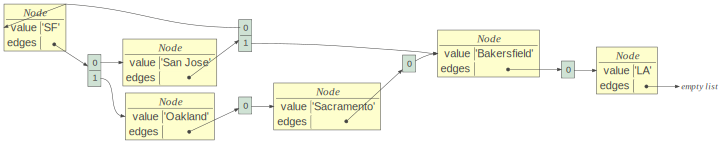

In [25]:
sf = Node("SF")
la = Node("LA")
sac = Node("Sacramento")
oak = Node("Oakland")
baker = Node("Bakersfield")
sj = Node("San Jose")
sf.add(sj)
sj.add(sf)
sj.add(baker)
sf.add(oak)
oak.add(sac)
sac.add(baker)
baker.add(la)

objviz(sf)

In [30]:
def walkGraph_DFS(p, visited=set()):
    if p in visited: return
    print(p.value)
    visited.add(p)
    for q in p.edges:
        walkGraph_DFS(q, visited)
        
# O(n,m) = O(n+m) for n nodes and m edges

In [31]:
walkGraph_DFS(sf, visited=set())

SF
San Jose
Bakersfield
LA
Oakland
Sacramento


### Check for cycle in the graph

In [50]:
def iscyclic(p):
    return iscyclic_(p, p, set())

def iscyclic_(start, p, visited):
    if p in visited:
        if p is start:
            return True # cyclic
        return False # stopping condition
    #print(p.value)
    visited.add(p)
    for q in p.edges:
        cond = iscyclic_(start, q, visited)
        if cond == True:
            return True
        
    return False

In [54]:
iscyclic(sf), iscyclic(sj), iscyclic(baker)

(True, True, False)

### Reachable nodes

In [182]:
def reachable(p):
    reaches = set()
    reachable_(p, reaches, visited=set())
    return reaches

In [183]:
def reachable_(p, reaches, visited):
    if p in visited: return
    #print(p.value)
    visited.add(p)
    for q in p.edges:
        reaches.add(q)
        reachable_(q, reaches, visited)

In [45]:
val = reachable(baker)
print([v.value for v in val])

['LA']


In [47]:
val = reachable(sf)
print({v.value for v in val})

{'Bakersfield', 'Sacramento', 'Oakland', 'LA', 'SF', 'San Jose'}


### Find reachable nodes and track the depth

In [184]:
def depth_reachable(p):
    reaches = dict()
    depth_reachable_(p, reaches, set(), depth=0)
    return reaches

In [187]:
def depth_reachable_(p, reaches, visited, depth):
    if p in visited: return
    #print(p.value)
    visited.add(p)
    reaches[p] = depth
    for q in p.edges:
        depth_reachable_(q, reaches, visited, depth+1)

In [188]:
depth_reachable(sf)

{SF: 0, San Jose: 1, Bakersfield: 2, LA: 3, Oakland: 1, Sacramento: 2}

In [189]:
depth_reachable(la)

{LA: 0}

### Find neibhouring nodes with k edges

In [16]:
def kneighbors(p, k):
    reaches = dict()
    k_reachable_(p, k, reaches, set(), depth=0)
    return reaches

In [193]:
def k_reachable_(p, k, reaches, visited, depth):
    if p in visited or depth>k: return
    #print(p.value)
    visited.add(p)
    reaches[p] = depth
    for q in p.edges:
        k_reachable_(q, k, reaches, visited, depth+1)

In [195]:
kneighbors(sf, 0)

{SF: 0}

In [196]:
kneighbors(sf, 1)

{SF: 0, San Jose: 1, Oakland: 1}

In [197]:
kneighbors(sf, 2)

{SF: 0, San Jose: 1, Bakersfield: 2, LA: 2, Oakland: 1, Sacramento: 2}

In [198]:
kneighbors(sf, 3)

{SF: 0, San Jose: 1, Bakersfield: 2, LA: 3, Oakland: 1, Sacramento: 2}

### Find path from p to q

In [136]:
def path(p, q):
    return path_(p, q, [p], set())

In [137]:
def path_(p, q, path_list, visited):
    if p is q: return path_list
    if p in visited: return None
    #print(p.value)
    visited.add(p)
    for a in p.edges:
        if a not in path_list:   # avoid cycles
            v = path_(a, q, path_list+[a], visited)
            if v is not None:
                return v
    return None
    

In [138]:
sf_la = path(sf, la)
[v.value for v in sf_la]

['SF', 'San Jose', 'Bakersfield', 'LA']

In [139]:
sf_sf = path(sf, sf)
[v.value for v in sf_sf]

['SF']

### All possible paths from p to q

In [142]:
def allpath(p, q):
    allpaths = []
    allpaths_(p, q ,[p] , allpaths, visited=set())
    return allpaths

In [143]:
def allpaths_(p, q, path_list, allpaths, visited):
    if p is q:
        allpaths.append(path_list)
        return
    if p in visited: return
    #print(p.value)
    visited.add(p)
    for a in p.edges:
        allpaths_(a, q, path_list+[a], allpaths, visited)
    return None

In [144]:
ans = allpath(sf, baker)
[[v.value for v in ans2] for ans2 in ans] 

[['SF', 'San Jose', 'Bakersfield'],
 ['SF', 'Oakland', 'Sacramento', 'Bakersfield']]

### Labeled edges

In [146]:
class LNode:
    def __init__(self, value):
        self.value = value
        self.edges = {} # outgoing edges
    def add(self, label, target):
        self.edges[label] = target
    def __repr__(self): 
        return str(self.value)

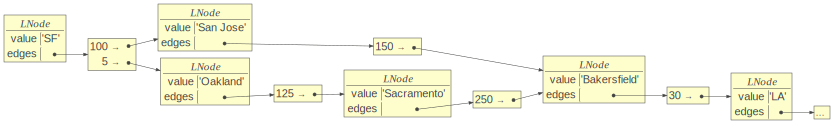

In [175]:
sf = LNode("SF")
la = LNode("LA")
sac = LNode("Sacramento")
oak = LNode("Oakland")
baker = LNode("Bakersfield")
sj = LNode("San Jose")
sf.add(100,sj)
sj.add(150,baker)
sf.add(5,oak)
oak.add(125,sac)
sac.add(250,baker)
baker.add(30,la)

fresno = LNode("Fresno")
fresno.add(60,baker)

objviz(sf)

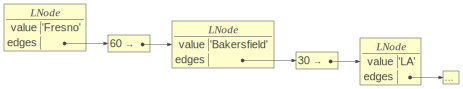

In [148]:
objviz(fresno)

### Breadth first search BFS

In [162]:
def BFS(root):
    visited = {root}
    walk = [root]
    while len(walk)>0:
        p = walk.pop(0) # get node from front # or use queue
        print("visit ",p.value)
        for q in p.edges:
            if q not in visited:
                print(f"\tAdd {q.value} to worklist")
                visited.add(q)
                walk.append(q)

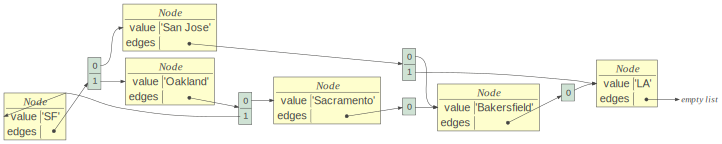

In [176]:
sf = Node("SF")
la = Node("LA")
sac = Node("Sacramento")
oak = Node("Oakland")
baker = Node("Bakersfield")
sj = Node("San Jose")
sf.add(sj)
sj.add(baker)
sf.add(oak)
oak.add(sac)
oak.add(sf)
sac.add(baker)
baker.add(la)
sj.add(la)

objviz(sf)

In [164]:
BFS(sf)

visit  SF
	Add San Jose to worklist
	Add Oakland to worklist
visit  San Jose
	Add Bakersfield to worklist
	Add LA to worklist
visit  Oakland
	Add Sacramento to worklist
visit  Bakersfield
visit  LA
visit  Sacramento


In [165]:
BFS(la)

visit  LA


### Find shortest path from p to q

In [177]:
def shotest_path(root, q):
    visited = {root}
    walk = [[root]]
    while len(walk)>0:
        path = walk.pop(0) # get node from front # or use queue
        print("path ",path)
        p = path[-1]
        if p is q: return path  # got the target
        for a in p.edges:
            if a not in visited:
                visited.add(a)
                walk.append(path+[a])
                print(walk)
            

In [178]:
shotest_path(sf, la)

path  [SF]
[[SF, San Jose]]
[[SF, San Jose], [SF, Oakland]]
path  [SF, San Jose]
[[SF, Oakland], [SF, San Jose, Bakersfield]]
[[SF, Oakland], [SF, San Jose, Bakersfield], [SF, San Jose, LA]]
path  [SF, Oakland]
[[SF, San Jose, Bakersfield], [SF, San Jose, LA], [SF, Oakland, Sacramento]]
path  [SF, San Jose, Bakersfield]
path  [SF, San Jose, LA]


[SF, San Jose, LA]

In [181]:
shotest_path(sf,sj)

path  [SF]
[[SF, San Jose]]
[[SF, San Jose], [SF, Oakland]]
path  [SF, San Jose]


[SF, San Jose]

### Topological sort ( acyclic graph)
- task ordering
- DFS

In [199]:
MSDS = """501->690 
502,504,693->601
601->604 
601,604->623
501,502,504->621
691,697,693->603
693->692 
501->694 
501->691 
691->697 
501,692,693->622
621->630 
501,693,601,692->605
605,621,604->625
693->610 
610->696 
630,623,603->631 
501->695 
625,630,622,603,623->632"""

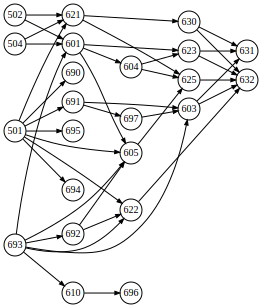

In [200]:
from graphviz import *

graphviz.Source('digraph G {rankdir=LR; ranksep=.5; nodesep=.1; edge [arrowsize=.5]; node [fontsize=10, fixedsize=true, width=.3, height=.3]\n'+MSDS+'\n}')

In [210]:
nodes = {}
lines = MSDS.split('\n')
for line in lines:
    line = line.strip()
    left,right = line.split('->')
    if right in nodes:
        target = nodes[right]
    else:
        target = Node(right)
        nodes[right] = target
        
    for u in left.split(','):
        if u in nodes:
            prereq = nodes[u]
        else:
            prereq = Node(u)
            nodes[u] = prereq
        prereq.add(target)

In [211]:
nodes

{'690': 690,
 '501': 501,
 '601': 601,
 '502': 502,
 '504': 504,
 '693': 693,
 '604': 604,
 '623': 623,
 '621': 621,
 '603': 603,
 '691': 691,
 '697': 697,
 '692': 692,
 '694': 694,
 '622': 622,
 '630': 630,
 '605': 605,
 '625': 625,
 '610': 610,
 '696': 696,
 '631': 631,
 '695': 695,
 '632': 632}

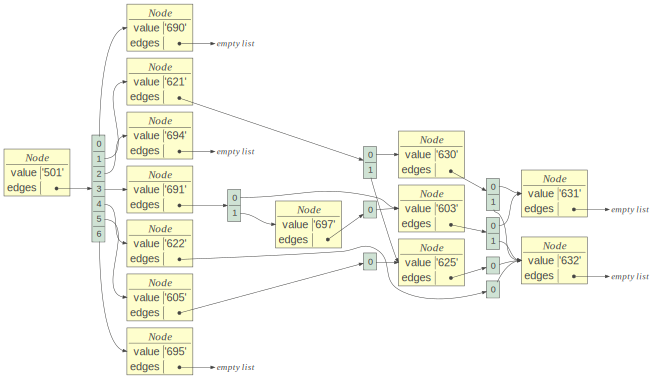

In [212]:
objviz(nodes['501'])

### DFS based topological sort
- DFS post-order traversal

In [218]:
def postorderDFS(p, sort, visited=set()):
    if p in visited: return 
    #print(p.value)
    visited.add(p)
    for q in p.edges:
        postorderDFS(q, sort, visited)
    sort.append(p)     

### DFS postorder traversal with multiple roots 

In [221]:
def toposort(root):
    sort = []
    visited = set()
    while len(visited)<len(root):
        li = [p for p in root.values() if p not in visited]
        if len(li)>0:
            postorderDFS(li[0], sort, visited)
    return sort

In [222]:
toposort(nodes)

[690,
 631,
 632,
 630,
 625,
 621,
 694,
 603,
 697,
 691,
 622,
 605,
 695,
 501,
 623,
 604,
 601,
 502,
 504,
 692,
 696,
 610,
 693]

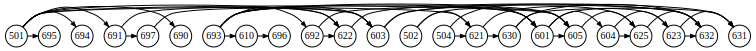

In [223]:
graphviz.Source('digraph G {rankdir=TD; ranksep=.3; nodesep=.15; edge [arrowsize=.5]; node [fontsize=10, fixedsize=true, width=.3, height=.3] {rank=same;\n'+MSDS+'\n}}')

non-recursive DFS : use stack<br>
non-recursive BFS : use queue